In [44]:
#Old data analysis (to be continued perhaps...)
from astropy.io.votable import is_votable, parse
import numpy as np
from numpy.ma import getmask

fname = "master_field_galaxies.vot"

is_votable(fname)

table = parse(fname)
full  = table.get_first_table()
arr   = full.array

In [5]:
arr.dtype.names

('ID_Laigle_16',
 'RA',
 'DEC',
 'Z_MUSE',
 'CONFID',
 'Blend',
 'Defect',
 'Revisit',
 'ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO'

In [87]:
fluxOII3726     = arr['OII_3726_FLUX']
fluxOII3726_err = arr['OII_3726_FLUX_ERR']
fluxOII3729     = arr['OII_3729_FLUX']
fluxOII3729_err = arr['OII_3729_FLUX_ERR']

fluxOII_err = (fluxOII3726_err + fluxOII3729_err)
fluxOII     = (fluxOII3726 + fluxOII3729)
maskFluxOII = np.logical_not(getmask(fluxOII))

FWHM_OII = arr['PSF_FWHM_o2']
maskFWHM = np.logical_not(getmask(FWHM_OII))

mass       = arr['lmass']
mass_lower = arr['l68_lmass']
mass_upper  = arr['u68_lmass']
maskMass   = np.logical_not(getmask(mass))

lsfr_lower = arr['l68_lsfr']
lsfr_upper  = arr['u68_lsfr']
lsfr       = arr['lsfr']
masklsfr   = np.logical_not(getmask(lsfr))

age_lower = arr['l68_lage']
age_upper  = arr['u68_lage']
age       = arr['lage']
maskAge   = np.logical_not(getmask(age))

#Applying masks to get rid of NaNs and so forth
if maskFluxOII.shape[0] <= masklsfr.shape[0]:
    #get the second mask to apply
    lsfr         = lsfr[maskFluxOII]
    tmp         = np.logical_not(getmask(lsfr))
    
    lsfr         = lsfr[tmp]
    lsfr_lower   = lsfr_lower[maskFluxOII][tmp]
    lsfr_upper   = lsfr_upper[maskFluxOII][tmp]
    fluxOII     = fluxOII[maskFluxOII][tmp]
    fluxOII_err = fluxOII_err[maskFluxOII][tmp]
else:
    fluxOII     = fluxOII[masklsfr]
    tmp         = np.logical_not(getmask(fluxOII))
    
    fluxOII     = fluxOII[tmp]
    fluxOII_err = fluxOII_err[masklsfr][tmp]
    lsfr         = lsfr[masklsfr][tmp]
    lsfr_lower   = lsfr_lower[masklsfr][tmp]
    lsfr_upper   = lsfr_upper[masklsfr][tmp]
    
lsfr

masked_array(data=[0.07999999821186066, -1.440000057220459,
                   -0.9200000166893005, -2.299999952316284,
                   -1.840000033378601, -0.8199999928474426,
                   -1.2999999523162842, 0.05999999865889549,
                   -0.4300000071525574, -1.399999976158142,
                   -1.0399999618530273, -0.8199999928474426,
                   0.8799999952316284, 0.23999999463558197,
                   -0.47999998927116394, -3.3499999046325684,
                   0.6100000143051147, 0.8799999952316284,
                   -0.6499999761581421, -0.3400000035762787,
                   -0.3199999928474426, 1.1699999570846558,
                   0.5799999833106995, -1.350000023841858,
                   -1.3899999856948853, 0.07000000029802322,
                   0.8199999928474426, 1.5299999713897705,
                   -0.30000001192092896, 0.46000000834465027,
                   -0.8600000143051147, 1.6699999570846558,
                   0.57999998331069

In [88]:
print("{:.3e}".format(fluxOII_err.max()))
print(lsfr.shape[0], lsfr_lower.shape[0])
lsfr.shape[0] == fluxOII.shape[0]

sorting_indices = np.argsort(fluxOII_err)
fluxOII         = fluxOII[sorting_indices]
fluxOII_err     = fluxOII_err[sorting_indices]
lsfr             = lsfr[sorting_indices]
lsfr_lower       = lsfr_lower[sorting_indices]
lsfr_upper       = lsfr_upper[sorting_indices]

1.164e+10
487 487


True

In [1]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{yr}^{-1}))$")

Text(0.5, 0, '$\\log_{10}(\\rm{SFR}/(M_{\\odot} \\rm{yr}^{-1}))$')

<ErrorbarContainer object of 3 artists>

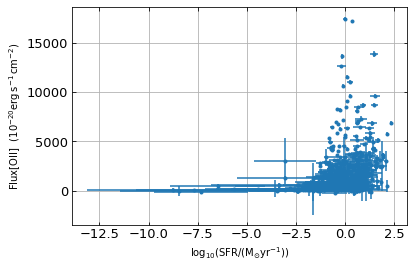

In [100]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\log_{10}(\rm{SFR}/(M_{\odot} \rm{yr}^{-1}))$")

plt.errorbar(lsfr[:-2], fluxOII[:-2], xerr=(lsfr_upper[:-2]-lsfr_lower[:-2])/2.0, yerr=fluxOII_err[:-2], marker=".", linestyle='none')

In [93]:
sfr = 10**(lsfr)

sfr_lower = lsfr_lower*np.log(10)*np.abs(10**(lsfr))

sfr_upper = lsfr_upper*np.log(10)*np.abs(10**(lsfr))

import matplotlib.pyplot as plt
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

plt.ylabel(r"$\rm{Flux [OII]} \ \ (10^{-20} \rm{erg\, s^{-1} \,cm^{-2}})$")
plt.xlabel(r"$\rm{SFR} \ \ (M_{\odot} \rm{yr}^{-1})$")

plt.errorbar(sfr[:-2], fluxOII[:-2], xerr=(sfr_upper[:-2]-sfr_lower[:-2])/2.0, yerr=fluxOII_err[:-2], marker=".", linestyle='none')

In [2]:
#New data analysis similar to that of Analyze_cluster_galaxies
from astropy.io.votable import is_votable, parse
from astropy.table import Table
from astropy import units as u
import numpy as np

In [9]:
def is_VOtable(fullname):
    tag = is_votable(fullname)
    print("The file", fullname, "is a VOtable, right ?", tag)
    return tag

In [10]:
pathdata = "outputs/"
data     = ["matching_fieldGals_with_Cassata_and_Tasca_acc_1_arcsec.vot"]

#Checking that file format is correct
for name in data:
    voTag = is_VOtable(pathdata+name)
    if voTag:        
        fullFileName = pathdata + name
        #Retrieving the data
        table = parse(fullFileName)
        full  = table.get_first_table()
        
        print("Size of", name, "is", full.array.shape[0], "\n")
    else:
        exit("Exiting")

The file outputs/matching_fieldGals_with_Cassata_and_Tasca_acc_1_arcsec.vot is a VOtable, right ? True
Size of matching_fieldGals_with_Cassata_and_Tasca_acc_1_arcsec.vot is 294 



In [16]:
#Getting data
bothMatch = parse(pathdata+data[0]).get_first_table().array

In [17]:
#Checking that the matching procedure did not duplicate galaxies
master = [bothMatch]

for catalog, nameCat in zip(master, data):
    for ra, nb in zip(catalog['RA'], range(catalog['RA'].shape[0])):
        pos = np.where(catalog['RA']==ra)
        i = 1
        cnt = True
        if pos[0].shape[0] > i:
            print("RA = ", ra, "deg is present more than once at positions", nb, "and", pos[i][0], "in catalog", nameCat)
            cnt = False
    if cnt:
        print("All the galaxies are only listed once in the catalog", nameCat + ".")

All the galaxies are only listed once in the catalog matching_fieldGals_with_Cassata_and_Tasca_acc_1_arcsec.vot.


In [19]:
#Now working on the full match (bothMatch variable)
#Converting to an astropy table for simplicity
table = Table(bothMatch)

table

ID_Laigle_16,RA,RA_TASCA,RA_CASSATA,DEC,Z_MUSE,CONFID,Blend,Defect,Revisit,ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLAG_HJMCC,FLUX_RADIUS,KRON_RADIUS,EBV,FLAG_PETER,FLAG_COSMOS,FLAG_DEEP,FLAG_SHALLOW,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Ks_FLAGS,Ks_IMAFLAGS_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,Y_FLAGS,Y_IMAFLAGS_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,H_FLAGS,H_IMAFLAGS_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,J_FLAGS,J_IMAFLAGS_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,B_FLAGS,B_IMAFLAGS_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,V_FLAGS,V_IMAFLAGS_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,ip_FLAGS,ip_IMAFLAGS_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,r_FLAGS,r_IMAFLAGS_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,u_FLAGS,u_IMAFLAGS_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zp_FLAGS,zp_IMAFLAGS_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,zpp_FLAGS,zpp_IMAFLAGS_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA484_FLAGS,IA484_IMAFLAGS_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA527_FLAGS,IA527_IMAFLAGS_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA624_FLAGS,IA624_IMAFLAGS_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA679_FLAGS,IA679_IMAFLAGS_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA738_FLAGS,IA738_IMAFLAGS_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IA767_FLAGS,IA767_IMAFLAGS_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB427_FLAGS,IB427_IMAFLAGS_ISO,I

In [20]:
#Checking that the maximum angular separation is less than 1 arcsec
print("Maximum separation is", str((table['Separation_CASSATA']*u.arcsec).max()) + ".")

Maximum separation is 0.8768483517534824 arcsec.


In [21]:
#Keep correct values by applying a mask
GF_R           = table['R_d_GF']
mask           = np.where(np.abs(GF_R)!=999)
GF_R           = GF_R[mask]
R_half_CASSATA = table['R_HALF_CASSATA'][mask]
R_half_TASCA   = table['R_HALF_TASCA'][mask]

print("There are values equal to +- 999 left in the array, right ?", np.any(np.abs(GF_R)==999))

There are values equal to +- 999 left in the array, right ? False


In [22]:
print(np.sort(GF_R))

R_d_GF
------
  2.95
   3.7
  4.42
  5.27
  6.81
  7.71
  8.46
  9.78
 10.63
 13.96
 26.45
  50.0


In [23]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats.mstats import chisquare

In [24]:
def linear_fit(x, A, offset):
    return A*x+offset

0.8686467309381218 0.01184732009980029


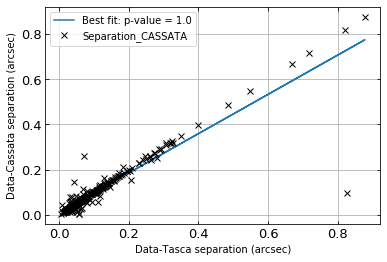

In [26]:
#Plotting the separation between data-TASCA and data-CASSATA
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

sep_TASCA   = table['Separation_TASCA']
sep_CASSATA = table['Separation_CASSATA']

#Compute linear fit
(A, offset), pcov  = curve_fit(linear_fit, sep_TASCA, sep_CASSATA, p0=[1.0, 0.0], check_finite=True)
sep_lin_fit        = linear_fit(sep_TASCA, A, offset)

print(A, offset)

#Perform chi-square test
chisq, pval = chisquare(sep_CASSATA, sep_lin_fit, ddof=2)

#Plot best-fit
plt.plot(sep_TASCA, sep_lin_fit, label="Best fit: p-value = " + str(pval))

#Plot data
plt.plot(sep_TASCA, sep_CASSATA, "kx")

plt.xlabel("Data-Tasca separation (arcsec)")
plt.ylabel("Data-Cassata separation (arcsec)")
plt.legend(loc='best')

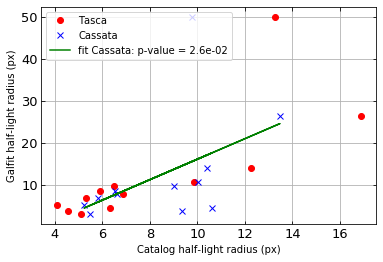

In [28]:
#Plotting the catalog radii against GF radius
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', direction='in', labelsize=13)
plt.grid()

#Compute linear fit
(A, offset), pcov  = curve_fit(linear_fit, R_half_CASSATA, GF_R, p0=[0.5, 1], check_finite=True)
sep_lin_fit        = linear_fit(R_half_CASSATA, A, offset)

#Perform chi-square test
chisq, pval = chisquare(R_half_CASSATA, sep_lin_fit, ddof=2)

#Plot data
plt.plot(R_half_TASCA, GF_R, "ro", label="Tasca")
plt.plot(R_half_CASSATA, GF_R, "bx", label="Cassata")

#Plot best fit
string = "fit Cassata: p-value = %.1e" %pval
plt.plot(R_half_CASSATA, sep_lin_fit, "g", label=string)

plt.ylabel("Galfit half-light radius (px)")
plt.xlabel("Catalog half-light radius (px)")
plt.legend(loc='best')